In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC, LinearSVC

Populating the interactive namespace from numpy and matplotlib


In [2]:
classes = [0,1,2]
markers = ['o','x','^']

In [3]:
iris_data = load_iris()

In [4]:
pd.value_counts(iris_data.target_names).index.tolist()

['versicolor', 'setosa', 'virginica']

In [5]:
pd.DataFrame(iris_data.data, columns=iris_data.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_features = iris_data.data[:, [0, 1]]
iris_labels = iris_data.target
iris_slice = pd.DataFrame(iris_data.data[:, [0, 1]], columns=[iris_data.feature_names[0], iris_data.feature_names[1]])

In [7]:
iris_slice.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [8]:
iris_features_train, iris_features_test, iris_labels_train, iris_labels_test = train_test_split(iris_features,
                                                                                               iris_labels,
                                                                                               train_size=0.7,
                                                                                               test_size=0.3)
print("Train data size:{},{}".format(iris_features_train.shape, iris_labels_train.shape))
print("Test data size:{},{}".format(iris_features_test.shape, iris_labels_test.shape))

Train data size:(105, 2),(105,)
Test data size:(45, 2),(45,)


In [9]:
scaler = StandardScaler()

In [10]:
iris_features_train_sc = scaler.fit_transform(iris_features_train)
iris_features_test_sc = scaler.fit_transform(iris_features_test)

In [11]:
pd.DataFrame(iris_features_train_sc).head()

,0,1
0,-0.259284,-0.785515
1,-1.717756,-0.113131
2,0.713031,0.335124
3,1.077649,-1.233770
4,1.077649,-0.113131


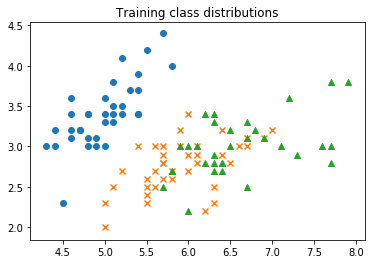

In [12]:
plt.title('Training class distributions')
for i,m in zip(classes,markers):
    class_data = np.where(iris_labels_train == i)
    plt.scatter(iris_features_train[class_data,0], iris_features_train[class_data,1], marker=m)

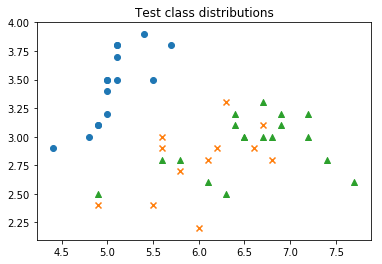

In [13]:
plt.title('Test class distributions')
for i,m in zip(classes,markers):
    class_data = np.where(iris_labels_test == i)
    plt.scatter(iris_features_test[class_data,0], iris_features_test[class_data,1], marker=m)

#### Sepal length and width are not very descriptive for the classes.

In [14]:
iris_features = iris_data.data[:, [2, 3]]
iris_labels = iris_data.target
iris_slice = pd.DataFrame(iris_data.data[:, [2, 3]], columns=iris_data.feature_names[2:])
iris_features_train, iris_features_test, iris_labels_train, iris_labels_test = train_test_split(iris_features,
                                                                                               iris_labels,
                                                                                               train_size=0.7,
                                                                                               test_size=0.3)
iris_features_train_sc = scaler.fit_transform(iris_features_train)
iris_features_test_sc = scaler.fit_transform(iris_features_test)

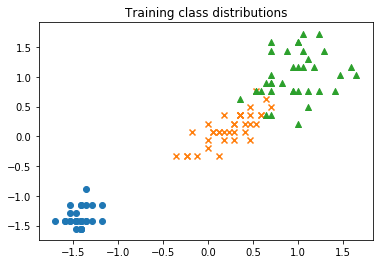

In [15]:
plt.title('Training class distributions')
for i,m in zip(classes,markers):
    class_data = np.where(iris_labels_train == i)
    plt.scatter(iris_features_train_sc[class_data,0], iris_features_train_sc[class_data,1], marker=m)

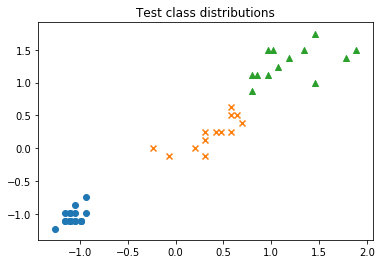

In [16]:
plt.title('Test class distributions')
for i,m in zip(classes,markers):
    class_data = np.where(iris_labels_test == i)
    plt.scatter(iris_features_test_sc[class_data,0], iris_features_test_sc[class_data,1], marker=m)

#### Petal length and width are a much better fit.

### Linear SVM Classifier

In [17]:
linear_svm = LinearSVC(C=1.0)

In [18]:
linear_svm.fit(iris_features_train_sc, iris_labels_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [19]:
iris_pred = linear_svm.predict(iris_features_test_sc)

In [20]:
print("Linear SVM Accuracy: {:.3f}".format(linear_svm.score(iris_features_test_sc, iris_labels_test)))

Linear SVM Accuracy: 0.933


In [21]:
print('Classification report for test data.')
print(classification_report(iris_labels_test, iris_pred, 
                            target_names=iris_data.target_names.tolist()))

Classification report for test data.
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      0.77      0.87        13
  virginica       0.81      1.00      0.90        13

avg / total       0.95      0.93      0.93        45



In [22]:
def plot_confusion_matrix(labels_test, labels_pred, target_names):
    print('Confusion matrix for test data.')
    cm = confusion_matrix(labels_test, labels_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + target_names.tolist())
    ax.set_yticklabels([''] + target_names.tolist())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Confusion matrix for test data.


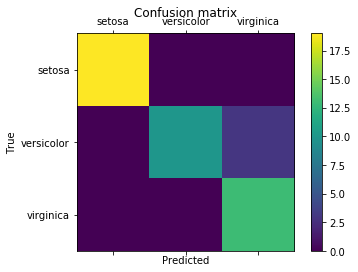

In [23]:
plot_confusion_matrix(iris_labels_test, iris_pred, iris_data.target_names)

In [24]:
def plot_decision_boundaries(features, labels, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', '^', 's', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(labels))])

    # plot the decision surface
    x1_min, x1_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    x2_min, x2_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(labels)):
        plt.scatter(x=features[labels == cl, 0], y=features[labels == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

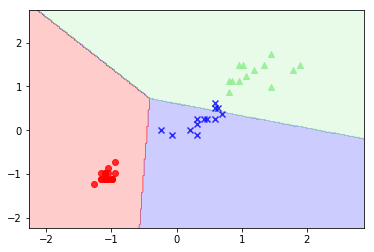

In [25]:
plot_decision_boundaries(iris_features_test_sc, iris_labels_test, linear_svm)

### Kernel SVM Classifier

In [26]:
kernel_svm = SVC(kernel='rbf', random_state=0, gamma=0.5, C=1)
kernel_svm.fit(iris_features_train_sc, iris_labels_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
iris_pred = kernel_svm.predict(iris_features_test_sc)

In [28]:
print("Kernel SVM Accuracy: {:.3f}".format(kernel_svm.score(iris_features_test_sc, iris_labels_test)))

Kernel SVM Accuracy: 0.978


In [29]:
print('Classification report for test data.')
print(classification_report(iris_labels_test, iris_pred, 
                            target_names=iris_data.target_names.tolist()))

Classification report for test data.
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      0.92      0.96        13
  virginica       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



Confusion matrix for test data.


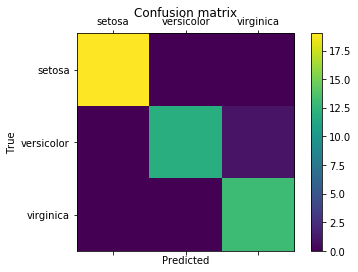

In [30]:
plot_confusion_matrix(iris_labels_test, iris_pred, iris_data.target_names)

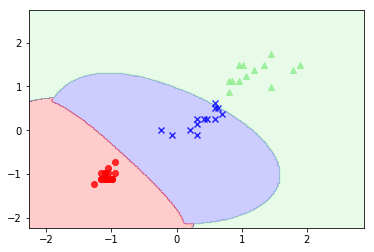

In [31]:
plot_decision_boundaries(iris_features_test_sc, iris_labels_test, kernel_svm)